In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

df = pd.read_csv("train.csv")

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
df.shape

(891, 12)

In [3]:
children = df[df['Age'] < 18]

In [4]:
percentage_of_children = children.shape[0] / df.shape[0]
format(percentage_of_children, "0%")

'12.682379%'

In [5]:
Mann = df[(df['Sex'] == 'male') & (df['Age'] > 18)]
Frau = df[(df['Sex'] == "female") & (df['Age'] > 18)]
ratio = Mann.shape[0] / Frau.shape[0]
print(ratio)

1.9792746113989637


In [6]:
###  Уровень 2
nan_count_age = df['Age'].isna().sum()
nan_count_age.sum()

177

In [7]:
nan_count_sex = df['Sex'].isna().sum()
nan_count_sex.sum()

0

In [8]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
df.dropna(inplace = True)

In [10]:
children = df[df['Age'] < 18]

In [11]:
women = df[(df['Sex'] == 'female') & (df['Age'] > 18)]
surviving_women = df[(df['Sex'] == 'female') & (df['Age'] > 18) & (df['Survived'] == 1)]
women_chance_of_survival = surviving_women.shape[0] / women.shape[0]
format(women_chance_of_survival, "0%")

'94.594595%'

In [12]:
man = df[(df['Sex'] == 'male') & (df['Age'] > 18)]
surviving_man = df[(df['Sex'] == 'male') & (df['Age'] > 18) & (df['Survived'] == 1)]
man_chance_of_survival = surviving_man.shape[0] / man.shape[0]
format(man_chance_of_survival, "0%")

'38.372093%'

In [13]:
women = df[(df['Sex'] == "female") & (df['Age'] > 18)]
survival_rate = women['Survived'].value_counts() * 100
survival_rate

Survived
1    7000
0     400
Name: count, dtype: int64

In [14]:
adult_men = df[(df['Sex'] == "male") & (df['Age'] > 18)]
a_m_survival_rate = adult_men['Survived'].value_counts() * 100
a_m_survival_rate

Survived
0    5300
1    3300
Name: count, dtype: int64

In [15]:
children = df[df['Age'] < 18]
surviving_children = df[(df['Age'] < 18) & (df['Survived'] == 1)]
child_chance_of_survival = surviving_children.shape[0] / children.shape[0]
format(child_chance_of_survival, "0%")

'89.473684%'

In [16]:
children = df[df['Age'] < 18]
survival_rate = children['Survived'].value_counts() * 100
survival_rate

Survived
1    1700
0     200
Name: count, dtype: int64

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Count'>

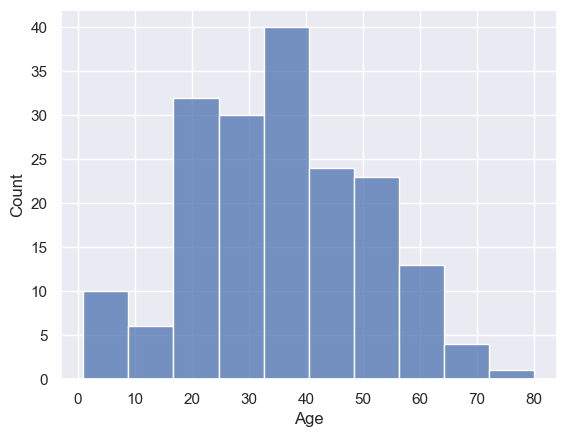

In [17]:
sns.set()
sns.histplot(data = df, x ='Age')

In [18]:
###  Уровень 3

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X = df[["Age",  "Pclass"]]
y = df["Survived"]


X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75)

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
model = LinearRegression()
model.fit(X_train, y_train)


print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.11210211849493934
-0.046891421766229735
